# Аналитика маркетинговых показателей в приложении покупки билетов

## СОДЕРЖАНИЕ

1.	[Общая информация](#start)
2.	[Отчеты и метрики.Продукт](#metr_pr)
    * [Сколько людей пользуются в день, неделю, месяц](#metr_pr_1)
    * [Сколько сессий в день](#metr_pr_2)
    * [Сколько длится одна сессия](#metr_pr_3)
    * [Как часто люди возвращаются](#metr_pr_4)
3.	[Отчеты и метрики.Продажи](#metr_sl)
    * [Когда люди начинают покупать](#metr_sl_1)
    * [Сколько раз покупают за период](#metr_sl_2)
    * [Какой средний чек](#metr_sl_3)
    * [Сколько денег приносят](#metr_sl_4)
4.	[Отчеты и метрики.Маркетинг](#metr_mr)
    * [Сколько денег потратили](#metr_mr_1)
    * [Сколько стоило привлечение одного покупателя из каждого источника](#metr_mr_2)
    * [На сколько окупились расходы](#metr_mr_3)  
5.	[Вывод](#conclusion)


## 1. Общая информация<a id="start"></a>


In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
visits = pd.read_csv('/Users/zherl/Downloads/visits_log.csv')
orders = pd.read_csv('/Users/zherl/Downloads/orders_log.csv')
costs = pd.read_csv('/Users/zherl/Downloads/costs.csv')

### Изучим таблицу visits:

In [3]:
display(visits.head())
print(visits.info())
print(visits.describe())

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None
           Source Id           Uid
count  359400.000000  3.594000e+05
mean        3.750515  9.202557e+18
std         1.917116  5.298433e+18
min         1.000000  1.186350e+13
25%         3.000000  4.613407e+18
50%         4.000000  9.227413e+18
75%         5.000000  1.372824e+19
max        10.000000  1.844668e+19


Необходимые доработки:
* изменение наименований столбцов
* изменения типа данных столбцов End Ts и Start Ts с  object на datetime
* проверка уникальных значений (отсутствие дубликатов, корректность значений) столбцов Device, Source Id

In [4]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']
#print(visits.head())

In [5]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format="%Y-%m-%d %H:%M:%S")
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format="%Y-%m-%d %H:%M:%S")
print(visits.duplicated().sum())
#print(visits.info())

0


In [6]:
print(visits['device'].value_counts())

desktop    262567
touch       96833
Name: device, dtype: int64


In [7]:
print(visits['source_id'].value_counts().reset_index().sort_values('index'))

   index  source_id
4      1      34121
3      2      47626
1      3      85610
0      4     101794
2      5      66905
8      6          6
7      7         36
5      9      13277
6     10      10025


Данные в таблице visits проверены, отредактированы, и готовы к дальнейшему анализу.

### Изучим таблицу orders:

In [8]:
display(orders.head())
print(orders.info())
print(orders.describe())

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None
            Revenue           Uid
count  50415.000000  5.041500e+04
mean       4.999647  9.098161e+18
std       21.818359  5.285742e+18
min        0.000000  3.135781e+14
25%        1.220000  4.533567e+18
50%        2.500000  9.102274e+18
75%        4.890000  1.368290e+19
max     2633.280000  1.844617e+19


Необходимые доработки:

* изменение наименований столбцов
* изменениу типа данных столбца Buy Ts с object на datetime

In [9]:
orders.columns = ['buy_ts', 'revenue', 'uid']
#print(orders.head())

In [10]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'], format="%Y-%m-%d %H:%M:%S")
print(orders.info())
print(orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None
0


Данные в таблице orders проверены, отредактированы, и готовы к дальнейшему анализу.

### Изучим таблицу costs:

In [11]:
display(costs.head())
print(costs.info())
print(costs.describe())

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None
         source_id        costs
count  2542.000000  2542.000000
mean      4.857199   129.477427
std       3.181581   156.296628
min       1.000000     0.540000
25%       2.000000    21.945000
50%       4.000000    77.295000
75%       9.000000   170.065000
max      10.000000  1788.280000


Необходимые доработки:

* проверка уникальных значений (отсутствие дубликатов, корректность значений) столбца source_id
* изменение типа данных столбца dt с object на datetime

In [12]:
print(costs['source_id'].value_counts().reset_index().sort_values('index'))

   index  source_id
1      1        363
2      2        363
3      3        363
4      4        363
0      5        364
5      9        363
6     10        363


In [13]:
costs['dt'] = pd.to_datetime(costs['dt'], format="%Y-%m-%d %H:%M:%S")
print(costs.duplicated().sum())
print(costs.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


Данные в таблице costs проверены, отредактированы, и готовы к дальнейшему анализу.

Вывод: все три таблицы загружены, значения в столбцах связанных с временем и датой переведены в формат datetime, наименования столбцов приведены к более удобному виду, в таблицах остутствуют дубликаты и пропущенные значения. Таблица visits связана с таблицей orders по столбцу uid, visits связана с таблицей costs по столбцу uid source_id. Таблица готова к дальнейшему преобразованию и анализу.

## 2.Построение отчётов и вычисление метрик продукта<a id="metr_pr"></a>

### 2.1 Сколько людей пользуются в день, неделю, месяц<a id="metr_pr_1"></a>

Рассчитаем:
* DAU (от англ. daily active users) — количество уникальных пользователей в день;
* WAU (от англ. weekly active users) — количество уникальных пользователей в неделю;
* MAU (от англ. monthly active users) — количество уникальных пользователей в месяц.


In [14]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date
visits['visits_month'] = visits['start_ts'].astype('datetime64[M]')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,visits_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01


In [15]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
print('Количество уникальных пользователей в день:', int(dau_total))
print('Количество уникальных пользователей в неделю:', int(wau_total)) 
print('Количество уникальных пользователей в месяц:', int(mau_total)) 

Количество уникальных пользователей в день: 907
Количество уникальных пользователей в неделю: 5716
Количество уникальных пользователей в месяц: 23228


Проверим, как ежемесячно менялся MAU:

AxesSubplot(0.125,0.11;0.775x0.77)


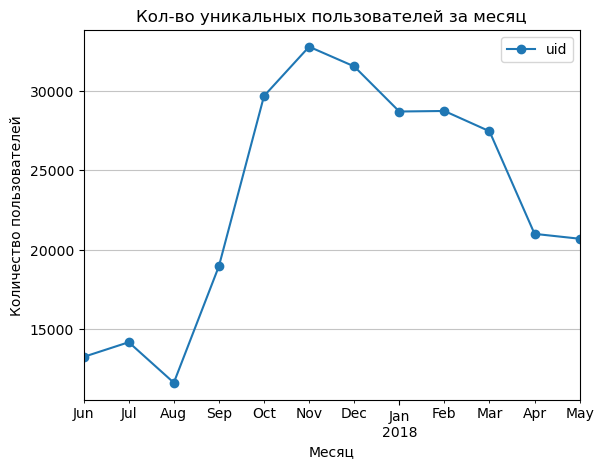

In [16]:
mau_total_month = visits.groupby('visits_month').agg({'uid': 'nunique'})
#display(mau_total_month)
print(mau_total_month.plot(style='o-', legend = True))
plt.title('Кол-во уникальных пользователей за месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.75)
plt.show()

Количество уникальных пользователей за месяц после августа увеличивается, достигает максимума в декабре, и начинает медленно падать до мая. Возможно это сезонные колебания, для сравнения хотелось бы увидеть еще один годовой период.

Рассчитаем липкий фактор

In [17]:
sticky_mau = dau_total/mau_total*100
sticky_wau = dau_total/wau_total*100
print(sticky_wau)
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


Рассмотроим данные метрики по устройствам, с которых были произведены визиты:

In [18]:
desktop = visits.query('device in "desktop"')
touch = visits.query('device in "touch"') 
#display(desktop)
#display(touch)

In [19]:
dau_desktop = desktop.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_desktop = desktop.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_desktop = desktop.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
mau_desktop_month = desktop.groupby('visits_month').agg({'uid': 'nunique'})
print('Количество уникальных пользователей в день с устройства desktop:', int(dau_desktop))
print('Количество уникальных пользователей в неделю с устройства desktop:', int(wau_desktop)) 
print('Количество уникальных пользователей в месяц с устройства desktop:', int(mau_desktop)) 

Количество уникальных пользователей в день с устройства desktop: 659
Количество уникальных пользователей в неделю с устройства desktop: 4129
Количество уникальных пользователей в месяц с устройства desktop: 16724


In [20]:
dau_touch = touch.groupby('session_date').agg({'uid': 'nunique'}).mean()
wau_touch = touch.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean()
mau_touch = touch.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()
mau_touch_month = touch.groupby('visits_month').agg({'uid': 'nunique'})
print('Количество уникальных пользователей в день с устройства touch:', int(dau_touch))
print('Количество уникальных пользователей в неделю с устройства touch:', int(wau_touch)) 
print('Количество уникальных пользователей в месяц с устройства touch:', int(mau_touch)) 

Количество уникальных пользователей в день с устройства touch: 252
Количество уникальных пользователей в неделю с устройства touch: 1634
Количество уникальных пользователей в месяц с устройства touch: 6825


С устройства touch визитов в 2,7 раза меньше чем с устройств desktop. По метрикам dau, wau, mau это также прослеживается. Возможно мобильная версия сайта (приложение) "не дружелюбна" для пользователя, возможность есть сложность с просмотром или сортировкой событий, или оплатой билетов. 

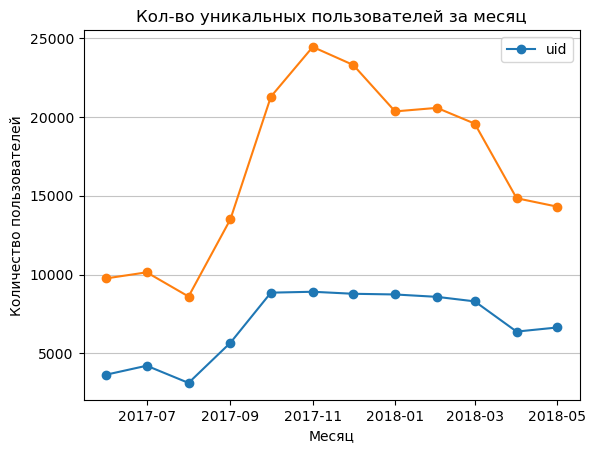

In [21]:
plt.plot(mau_touch_month, 'o-')  
plt.plot(mau_desktop_month, 'o-') 
plt.title('Кол-во уникальных пользователей за месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество пользователей')
plt.legend(mau_touch_month)
plt.legend(mau_desktop_month)
plt.grid(axis='y', alpha=0.75)
plt.show()


При рассмотрении количества уникальных пользователей в месяц в период с 06.2017 по 05.2018, заметно, что рост пользователей с августа по декабрь происходит за счет клиентов, зашедших с устройств dekstop. У пользователей, использующих устройства touch, рост с августа по октябрь также прослеживается, но затем он остается на одном и том же уровне до марта 2018.

### 2.2 Сколько сессий в день<a id="metr_pr_2"></a>

Рассчитаем среднее количество сессий в день:

In [22]:
visits_per_uid = visits.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
visits_per_uid.columns = ['n_visits', 'n_uid']
visits_per_uid['visits_per_uid'] = visits_per_uid['n_visits'] / visits_per_uid['n_uid']
#display(visits_per_uid)
print(visits_per_uid['visits_per_uid'].describe())

count    364.000000
mean       1.082170
std        0.020876
min        1.000000
25%        1.070321
50%        1.082488
75%        1.093876
max        1.217837
Name: visits_per_uid, dtype: float64


Проверим, есть ли различия между пользователями, зашедших с разных устройств:

In [23]:
desktop_per_uid = desktop.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
desktop_per_uid.columns = ['n_visits', 'n_uid']
desktop_per_uid['desktop_per_uid'] = desktop_per_uid['n_visits'] /desktop_per_uid['n_uid']
#display(desktop_per_uid)
print(desktop_per_uid['desktop_per_uid'].describe())

count    364.000000
mean       1.088955
std        0.022482
min        1.000000
25%        1.075870
50%        1.089000
75%        1.102551
max        1.209981
Name: desktop_per_uid, dtype: float64


In [24]:
touch_per_uid = touch.groupby(['session_year', 'session_date']).agg({'uid': ['count','nunique']})
touch_per_uid.columns = ['n_visits', 'n_uid']
touch_per_uid['touch_per_uid'] = touch_per_uid['n_visits'] /touch_per_uid['n_uid']
#display(touch_per_uid)
print(touch_per_uid['touch_per_uid'].describe())

count    363.000000
mean       1.051072
std        0.021471
min        1.000000
25%        1.037665
50%        1.049618
75%        1.061226
max        1.180233
Name: touch_per_uid, dtype: float64


In [25]:
visits_per_uid_month = visits.groupby('visits_month').agg({'uid': ['count','nunique']})
visits_per_uid_month .columns = ['n_visits', 'n_uid']
visits_per_uid_month['visits_per_uid'] = visits_per_uid_month['n_visits'] / visits_per_uid_month['n_uid']
#display(visits_per_uid_month)

AxesSubplot(0.125,0.11;0.775x0.77)


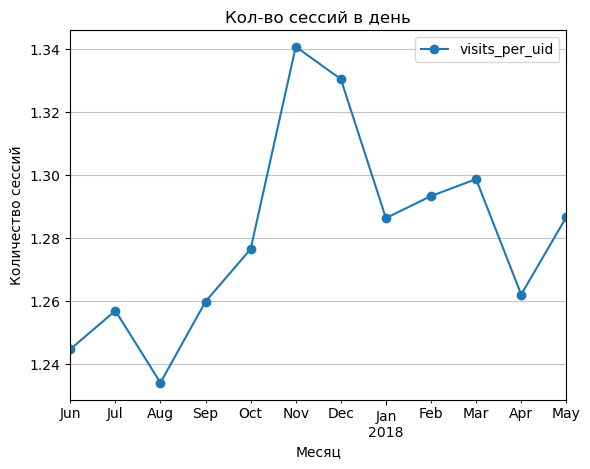

In [26]:
print(visits_per_uid_month.plot(y='visits_per_uid', style='o-', legend = True))
plt.title('Кол-во сессий в день')
plt.xlabel('Месяц')
plt.ylabel('Количество сессий')
plt.grid(axis='y', alpha=0.75)
plt.show()

В день один пользователь в среднем проводит в приложении 1 сессию. Можно сказать, что приложением пользуются регулярно. Явных различий между устройствами по этой метрике нет. Увеличение количества сессий наблюдается в ноябре и декабре.

### 2.3 Сколько длится одна сессия<a id="metr_pr_3"></a>

Рассчитаем ASL - cреднюю продолжительность сессии 

In [27]:
visits['visits_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print('Среднее время:', visits['visits_duration_sec'].mean()) 


Среднее время: 643.506488592098


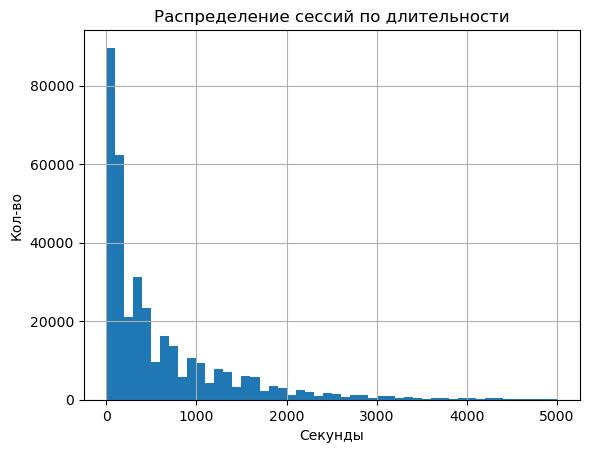

In [28]:
visits['visits_duration_sec'].hist(bins=50, range = (0, 5000)) 
plt.title('Распределение сессий по длительности')
plt.xlabel('Секунды')
plt.ylabel('Кол-во')
plt.show()

Распределние по длительности сессий соответствует распределению Пуассона, а не нормальному распределению, в таком случае найдем значение, которое встречается чаще всего:

In [29]:
print('ASL:', visits['visits_duration_sec'].mode())

ASL: 0    60
Name: visits_duration_sec, dtype: int64


Чаще всего, пользователи на сайте проводят 1 минуту.

Рассчитаем ASL для разных устройств и сравним их:

Среднее время с устройств desktop: 703.9469773429258


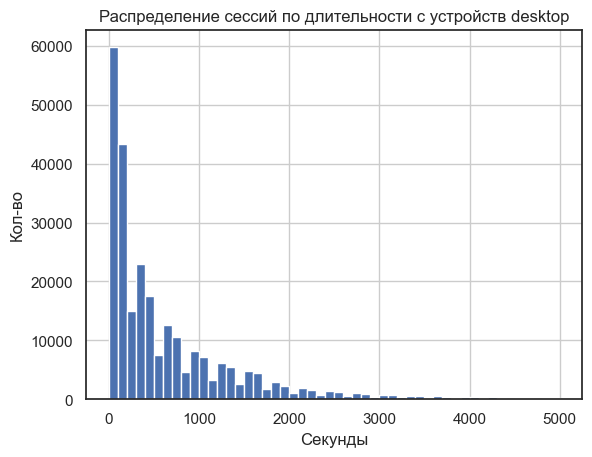

In [69]:
desktop['visits_duration_sec'] = (desktop['end_ts'] - desktop['start_ts']).dt.seconds
pd.options.mode.chained_assignment = None
print('Среднее время с устройств desktop:', desktop['visits_duration_sec'].mean())
desktop['visits_duration_sec'].hist(bins=50, range = (0, 5000)) 
plt.title('Распределение сессий по длительности с устройств desktop')
plt.xlabel('Секунды')
plt.ylabel('Кол-во')
plt.show()

Среднее время с устройств touch: 479.6194066072517


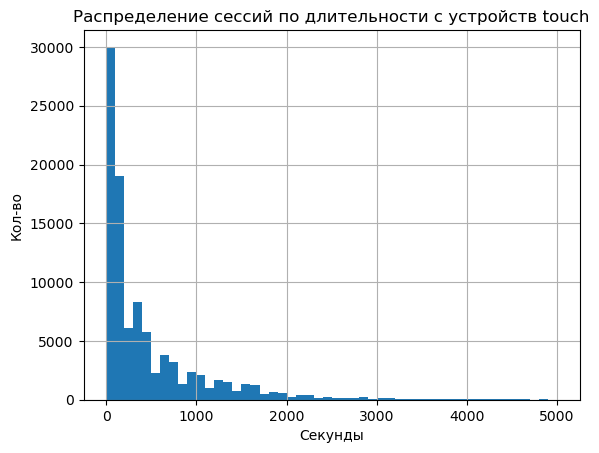

In [31]:
touch['visits_duration_sec'] = (touch['end_ts'] - touch['start_ts']).dt.seconds
pd.options.mode.chained_assignment = None
print('Среднее время с устройств touch:', touch['visits_duration_sec'].mean()) 
touch['visits_duration_sec'].hist(bins=50, range = (0, 5000)) 
plt.title('Распределение сессий по длительности с устройств touch')
plt.xlabel('Секунды')
plt.ylabel('Кол-во')
plt.show()

Т.к. оба распеределения не нормальны, найдем значения, встречающиеся чаще всего:

In [32]:
print('ASL desktop:', desktop['visits_duration_sec'].mode())
print('ASL touch:',touch['visits_duration_sec'].mode())

ASL desktop: 0    60
Name: visits_duration_sec, dtype: int64
ASL touch: 0    60
Name: visits_duration_sec, dtype: int64


Время пользователей на разных устройствах получилось одинаковое, и составляет 60сек.

### 2.4 Как часто люди возвращаются<a id="metr_pr_4"></a>

Рассчитаем Retention Rate - коэффициент удержания. 

In [33]:
first_activity_date = visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date,on='uid')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,visits_month,visits_duration_sec,first_activity_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,2017-12-01,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,2018-02-01,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,2018-05-01,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,2017-12-01,0,2017-12-27 14:06:00


In [34]:
visits['first_month'] = visits['first_activity_date'].astype('datetime64[M]')
#visits['visits_month'] = visits['start_ts'].astype('datetime64[M]')

In [35]:
visits['cohort_lifetime'] = visits['visits_month'] - visits['first_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1,'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int') 
cohorts = visits.groupby(['first_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index() 
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count,on='first_month')
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users'] 
cohorts['first_month'] = cohorts['first_month'].dt.strftime('%Y-%m')
retention_pivot = cohorts.pivot_table(index='first_month',columns='cohort_lifetime',values='retention',aggfunc='sum') 
#display(retention_pivot)

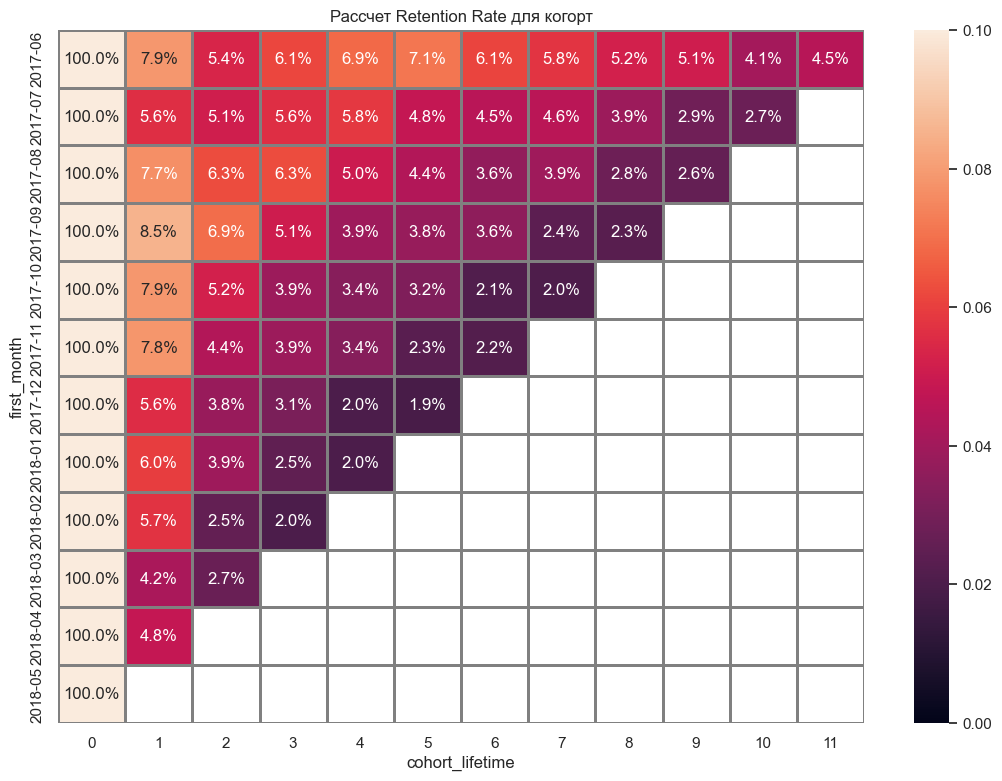

In [36]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Рассчет Retention Rate для когорт')
plt.xlabel('Время жизни когорты')
plt.ylabel('Первый месяц жизни кагорты')
sns.heatmap(retention_pivot,vmin=0, vmax=0.1, annot=True, fmt='.1%', linewidths=1, linecolor='gray')
plt.show()

cohort_lifetime
0     100.000000
1       6.516660
2       4.633262
3       4.275990
4       4.059457
5       3.944383
6       3.695659
7       3.750912
8       3.546465
9       3.515906
10      3.406250
11      4.495060
dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)


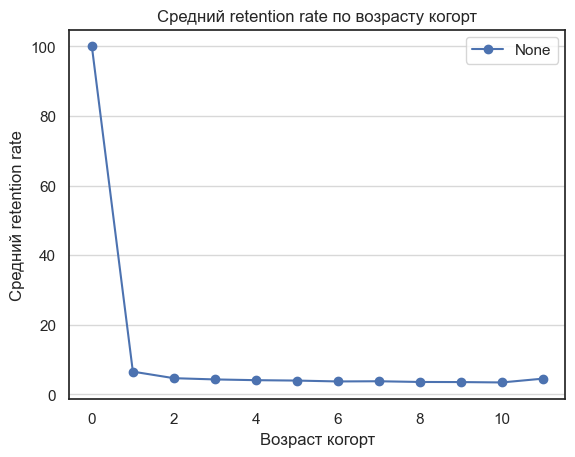

In [37]:
retention_pivot_mean = retention_pivot.mean()*100
display(retention_pivot_mean)
print(retention_pivot_mean.plot(style='o-', legend = True))
plt.title('Средний retention rate по возрасту когорт')
plt.xlabel('Возраст когорт')
plt.ylabel('Средний retention rate')
plt.grid(axis='y', alpha=0.75)
plt.show()

Наиболее высокий retention rate (Если не брать во внимание 0 месяц), наблюдается в 1-м месяце, 6,5%, далее он падает, и колеблется в диапазоне от 3,5 до 4,6%

После ноября 2017, коэффициент удержания упал. Т.е. с каждой новой когортой все меньше пользователей остается. Коэффициент удержания когорты июня 2017 самый высокий в течении всей жизни когорты. 

## 3.Построение отчётов и вычисление метрик продаж<a id="metr_sl"></a>

### 3.1 Когда люди начинают покупать<a id="metr_sl_1"></a>

Для того, чтобы ответить на данный вопрос нужно объединить таблицу first_activity_date с таблицей first_orders по столбцу uid. создадим таблицу first_orders, содержащую только первый заказ пользователей:

In [38]:
first_orders = orders.groupby(['uid'])['buy_ts'].min().reset_index()
first_orders.name = 'first_orders'
first_orders =first_orders.join(first_activity_date,on='uid')
display(first_orders.head())

,uid,buy_ts,first_activity_date
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


In [39]:
first_orders['time_left'] = first_orders['buy_ts'] - first_orders['first_activity_date']
first_orders['time_left'] = first_orders['time_left'] / np.timedelta64(1,'m')
display(first_orders.head())
display(first_orders['time_left'].describe())

,uid,buy_ts,first_activity_date,time_left
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,154022.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,79.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


count     36523.000000
mean      24340.175834
std       67784.774690
min           0.000000
25%           4.000000
50%          16.000000
75%        2897.000000
max      523144.000000
Name: time_left, dtype: float64

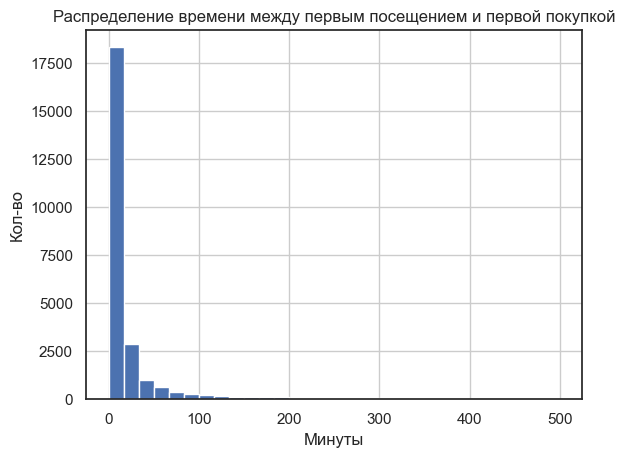

In [40]:
first_orders['time_left'].hist(bins=30, range = (0,500)) 
plt.title('Распределение времени между первым посещением и первой покупкой')
plt.xlabel('Минуты')
plt.ylabel('Кол-во')
plt.show()

Распределние по длительности времяни между первым посещением приложения и заказом соответствует распределению Пуассона, а не нормальному распрделению, поэтому используем медиану:

In [41]:
print('Люди начинают покупать через:', first_orders['time_left'].mode(), 'минут')

Люди начинают покупать через: 0    1.0
Name: time_left, dtype: float64 минут


В среднем люди совершают первую покупку через 1 минуту, но есть и те, кто совершает покупку сразу при входе в приложение, и те, кто делает свой первый заказа через год, после первого посещения.

### 3.2 Сколько раз покупают за период<a id="metr_sl_2"></a>

В данном случае я выбрала период - 1 месяц. Т.к. данные даны за 1 год, то удобнее рассматривать именно помесячный период. Найдем количество пользователей и количество заказов за 1 месяц, а также сколько в среднем делает заказов 1 пользователь.

In [42]:
orders['buy_ts_m'] = orders['buy_ts'].dt.strftime('%Y-%m')
orders_count = orders.groupby('buy_ts_m').agg({'uid': ['count','nunique']})
orders_count.columns = ['n_orders', 'n_uid']
orders_count['orders_per_uid'] = orders_count['n_orders'] / orders_count['n_uid']
display(orders_count)

,n_orders,n_uid,orders_per_uid
buy_ts_m,,,
2017-06,2354,2023,1.163618
2017-07,2363,1984,1.191028
2017-08,1807,1472,1.227582
2017-09,3387,2750,1.231636
2017-10,5679,4675,1.214759
2017-11,5659,4547,1.244557
2017-12,6218,4942,1.258195
2018-01,4721,3898,1.211134
2018-02,5281,4258,1.240254


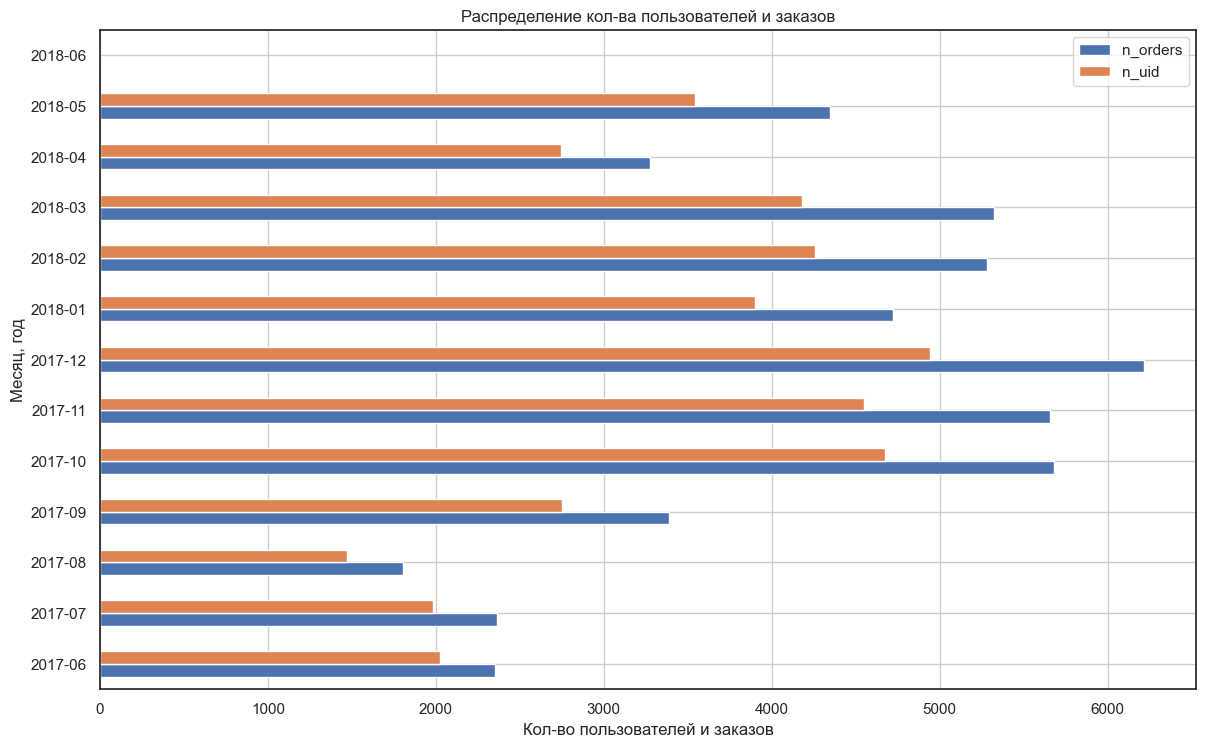

In [43]:
orders_count.plot(kind='barh', ylim=0, grid=True, figsize=(12, 7),legend=True, y=["n_orders", "n_uid"])
plt.legend(loc='upper right')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.title('Распределение кол-ва пользователей и заказов')
plt.xlabel('Кол-во пользователей и заказов')
plt.ylabel('Месяц, год')
plt.show()

In [44]:
orders_count = orders_count.reset_index()
orders_count = orders_count[orders_count['buy_ts_m']!='2018-06']
display(orders_count.describe())
#display(orders_count)

,n_orders,n_uid,orders_per_uid
count,12.000000,12.000000,12.000000
mean,4201.166667,3418.166667,1.222975
std,1511.972092,1183.258508,0.030695
min,1807.000000,1472.000000,1.163618
25%,3045.500000,2563.750000,1.206547
50%,4533.500000,3721.000000,1.226940
75%,5409.250000,4330.250000,1.241329
max,6218.000000,4942.000000,1.273858


В среднем за 1 месяц формируется 4200 заказов, на 1 пользователя в среднем приходится 1,2 заказа. Максимальное количество заказов и пользователей зафиксированы в декабре 2017года, это обусловлено большим количеством предновогодних программ, утреников для детей, а также покупкой билетов в подарок к новогодним праздникам. Меньше всего пользователей и покупок летом и в сентябре - т.к. это пора отпусков и каникул.

### 3.3 Какой средний чек<a id="metr_sl_3"></a>

In [45]:
orders = orders[orders['buy_ts_m']!='2018-06']
print('Средний чек за весь период равен: {:.2f}'.format(orders['revenue'].mean()))

Средний чек за весь период равен: 5.00


In [46]:
orders_check = orders.groupby('buy_ts_m').agg({'revenue': ['mean']})
display(orders_check)

,revenue
,mean
buy_ts_m,
2017-06,4.060106
2017-07,5.306589
2017-08,4.847139
2017-09,5.416448
2017-10,4.928280
2017-11,4.783518
2017-12,5.852139
2018-01,4.112927


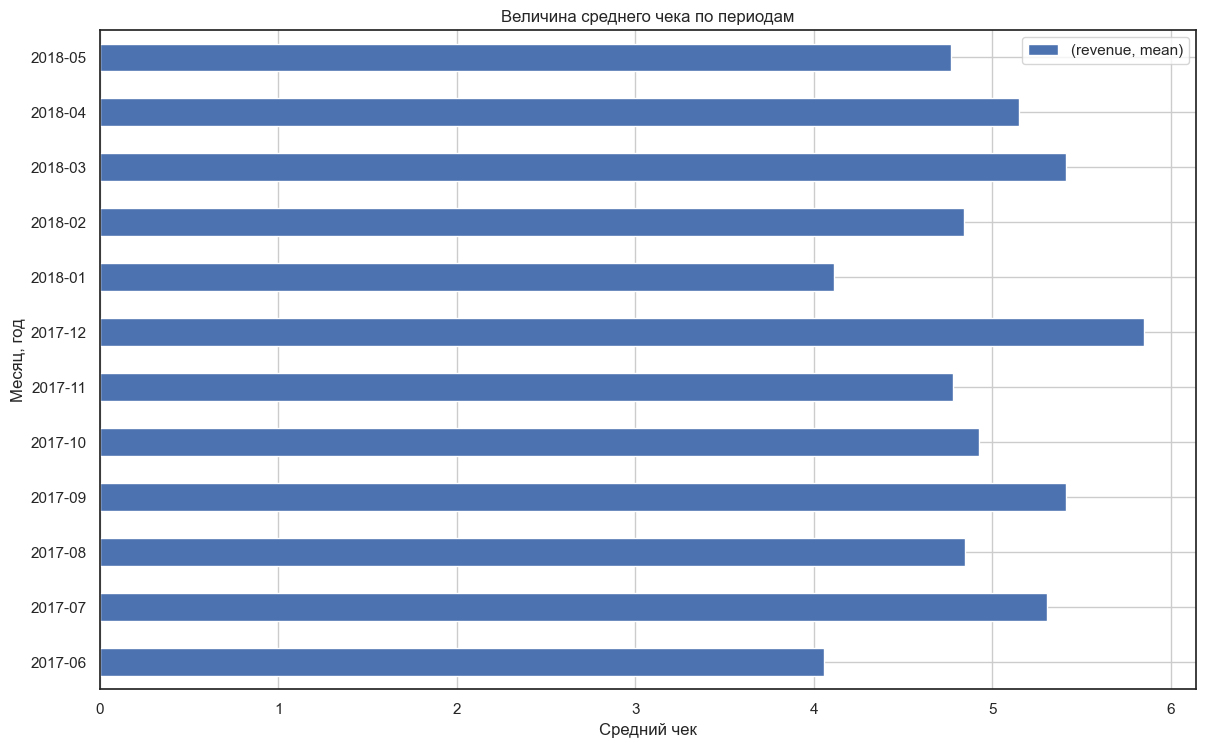

In [47]:
orders_check.plot(kind='barh', ylim=0, grid=True, figsize=(12, 7),legend=False)
plt.legend(loc='upper right')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.title('Величина среднего чека по периодам')
plt.xlabel('Средний чек')
plt.ylabel('Месяц, год')
plt.show()

Средний чек по выручке за весь период равен 5. В декабре 2017 самый высокий средний чек - 5,85. А в июне и январе самые низкие - 4,06 и 4,11.  

### 3.4 Сколько денег приносят?<a id="metr_sl_4"></a>

Чтобы ответить на этот вопрос, нужно найти LTV - итоговая сумма денег, которую один клиент приносит в среднем со всех своих покупок.

In [48]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders_1 = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_1.columns = ['uid', 'first_order_month']
#print(first_orders_1.head()) 

In [49]:
cohort_sizes_orders = first_orders_1.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes_orders.columns = ['first_order_month', 'n_buyers']
#print(cohort_sizes_orders.head()) 

In [50]:
orders_new = pd.merge(orders,first_orders_1, on='uid')
display(orders_new.head()) 

,buy_ts,revenue,uid,buy_ts_m,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,2017-06-01,2017-06-01


In [51]:
cohorts_orders = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes_orders, cohorts_orders, on='first_order_month')
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report.head())
display(cohorts_orders.head()) 

,first_order_month,n_buyers,order_month,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


Т.к. маржинальность в условиях проекта не задана, то примем ее за 100%:

In [52]:
margin_rate = 1
report['gp'] = report['revenue'] * margin_rate

In [53]:
report['ltv'] = report['gp'] / report['n_buyers']
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')

output.fillna('')
#display(output) 
display(output.round(decimals=2)) 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,NaN
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,NaN,NaN
2017-09-01,5.64,1.12,0.52,3.98,0.40,0.65,0.70,0.24,0.18,NaN,NaN,NaN
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,NaN,NaN,NaN,NaN
2017-11-01,5.15,0.40,0.20,0.32,0.15,0.05,0.11,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.14,0.29,0.30,0.14,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.16,0.28,0.08,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


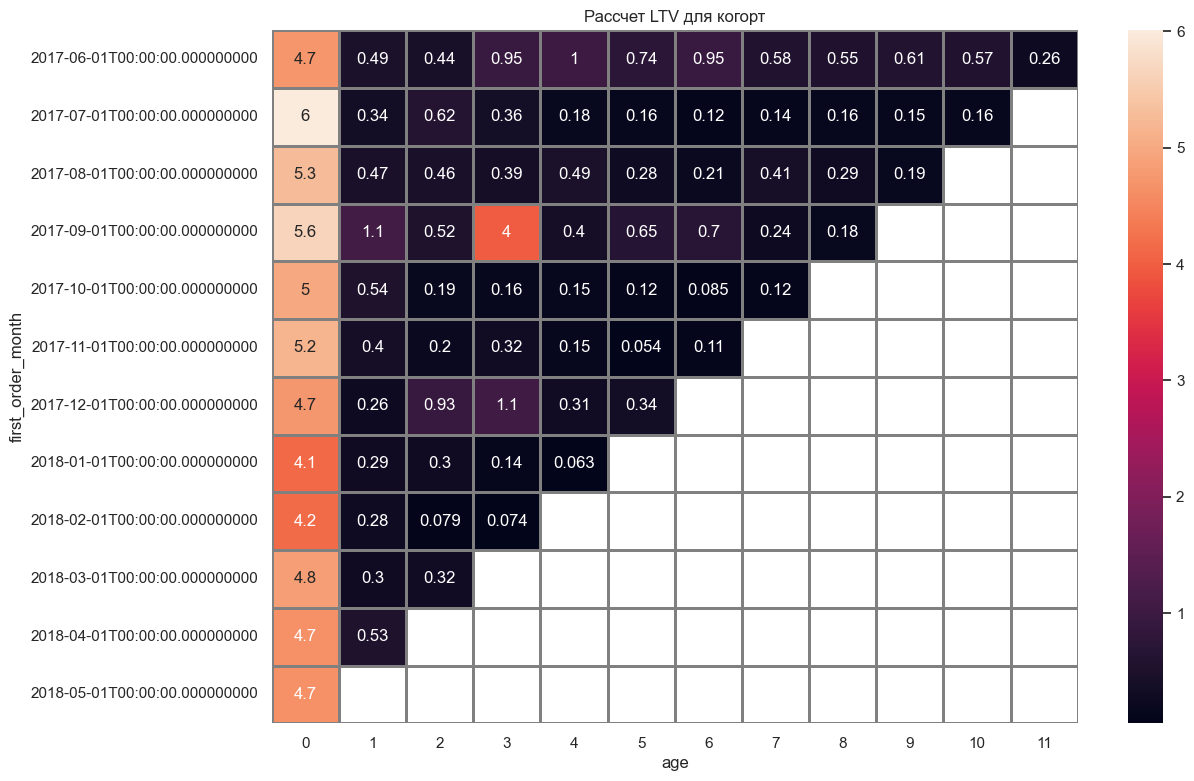

In [54]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Рассчет LTV для когорт')
plt.xlabel('Время жизни когорты')
plt.ylabel('Первый месяц жизни кагорты')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray')
plt.show()

Посчитаем итоговый LTV каждой кагорты

In [55]:
output_cumsum = output.cumsum(axis=1)
#display(output_cumsum) 

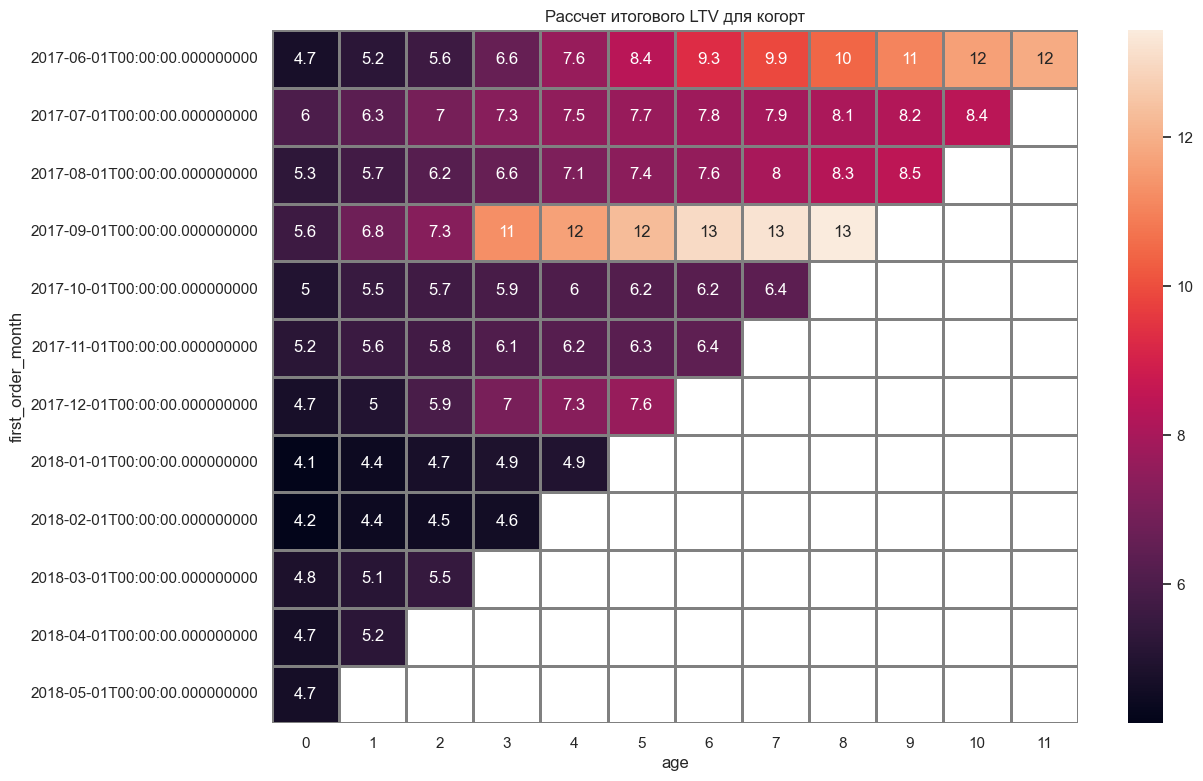

In [56]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Рассчет итогового LTV для когорт')
plt.xlabel('Время жизни когорты')
plt.ylabel('Первый месяц жизни кагорты')
sns.heatmap(output_cumsum, annot=True, linewidths=1, linecolor='gray')
plt.show()

Найдем средний LTV для каждого возраста когорты:

age
0     4.916823
1     0.455547
2     0.405498
3     0.827223
4     0.346141
5     0.333492
6     0.363777
7     0.297408
8     0.297666
9     0.313637
10    0.363467
11    0.256856
dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)


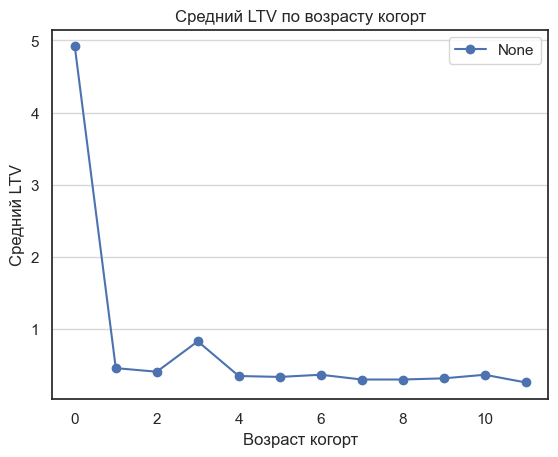

In [57]:
output_mean = output.mean()
display(output_mean)
print(output_mean.plot(style='o-', legend = True))
plt.title('Средний LTV по возрасту когорт')
plt.xlabel('Возраст когорт')
plt.ylabel('Средний LTV')
plt.grid(axis='y', alpha=0.75)
plt.show()

Найдем средний суммарный LTV для каждого возраста когорты:

age
0      4.916823
1      5.395666
2      5.821811
3      6.689763
4      7.298634
5      7.969053
6      8.387686
7      9.083583
8     10.062084
9      9.251340
10    10.004616
11    11.879234
dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)


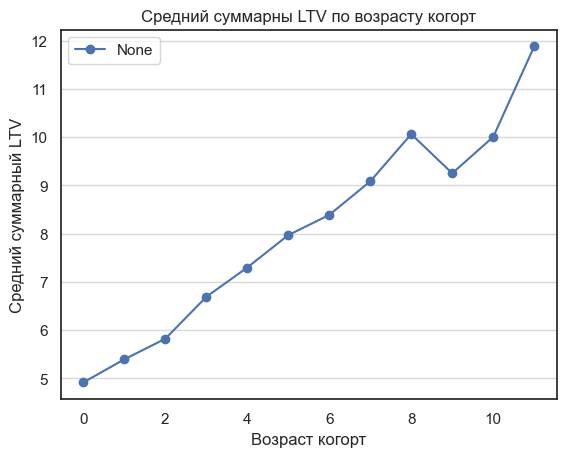

In [58]:
output_cumsum_mean = output_cumsum.mean()
display(output_cumsum_mean)
print(output_cumsum_mean.plot(style='o-', legend = True))
plt.title('Средний суммарны LTV по возрасту когорт')
plt.xlabel('Возраст когорт')
plt.ylabel('Средний суммарный LTV')
plt.grid(axis='y', alpha=0.75)
plt.show()

В первый месяц жизни во всех кагортах максимальный LTV. Далее этот показатель снижается. Самые высокие показатели итогового LTV наблюдаются в кагортах 06.2017 и 09.2017. В июньской кагорте наростание итогового LTV идет равномерно, а в кагорте 09.2017 в декабре 2017 (на 3-ем месяце "жизни") есть сначительный скачок в декабре 2017, у других кагорт в этом месяце нет такого значительного прироста. Рассмотрим его поподробнее:

In [59]:
output_1 = report.pivot_table(
        index='first_order_month', 
        columns='order_month',
        values= 'revenue', 
        aggfunc='sum').round(decimals=2)
output_1.fillna('')
#display(output_1) 

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_order_month,,,,,,,,,,,,
2017-06-01,9557.49,981.82,885.34,1931.3,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07-01,,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36
2017-08-01,,,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53
2017-09-01,,,,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92
2017-10-01,,,,,21716.2,2325.21,830.65,682.01,657.77,522.37,368.1,501.14
2017-11-01,,,,,,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02
2017-12-01,,,,,,,20767.49,1141.22,4054.7,4669.1,1371.57,1481.66
2018-01-01,,,,,,,,13949.5,994.22,1026.34,481.59,211.48
2018-02-01,,,,,,,,,15177.16,1015.98,286.66,270.70


Найдем количество покупателей в каждой когорте:

In [60]:
output_2 = report.pivot_table(
        index='first_order_month', 
        values='n_buyers', 
        aggfunc='mean')
output_2.fillna('')
#display(output_1) 

,n_buyers
first_order_month,
2017-06-01,2023
2017-07-01,1923
2017-08-01,1370
2017-09-01,2581
2017-10-01,4340
2017-11-01,4081
2017-12-01,4383
2018-01-01,3373
2018-02-01,3651


Сентябрьская когорта ничем не выделяется. Самое большое количество клиентов в когортах октября, ноября и декабря.

Рассмотри поведение сентябрьской когорты:

In [61]:
orders_new_2017_09  = orders_new.query('first_order_month in "2017-09-01"')
display(orders_new_2017_09.head()) 

,buy_ts,revenue,uid,buy_ts_m,order_month,first_order_month
9536,2017-09-01 00:04:00,0.24,12462986093031911909,2017-09,2017-09-01,2017-09-01
9537,2017-09-03 14:44:00,0.73,12462986093031911909,2017-09,2017-09-01,2017-09-01
9538,2017-09-06 14:53:00,0.49,12462986093031911909,2017-09,2017-09-01,2017-09-01
9539,2017-09-01 00:27:00,2.02,12897245252446895721,2017-09,2017-09-01,2017-09-01
9540,2017-09-01 07:02:00,14.67,14246124874955847629,2017-09,2017-09-01,2017-09-01


In [62]:
output_3 = orders_new_2017_09.pivot_table(
        index='buy_ts_m', 
        values='buy_ts', 
        aggfunc='count')
output_3.fillna('')

,buy_ts
buy_ts_m,
2017-09,2933
2017-10,219
2017-11,161
2017-12,164
2018-01,67
2018-02,109
2018-03,108
2018-04,56
2018-05,61


Самое большое количество заказов в данной когорте в сентября, октябре, ноябре и декабре. Но декабрь не выделяется слишком большим количеством заказов.

In [63]:
orders_new_2017_09_12  = orders_new_2017_09.query('order_month in "2017-12-01"')
display(orders_new_2017_09_12) 

,buy_ts,revenue,uid,buy_ts_m,order_month,first_order_month
9553,2017-12-05 11:39:00,0.73,9737640335185488211,2017-12,2017-12-01,2017-09-01
9631,2017-12-29 12:41:00,1.83,9717064693397929427,2017-12,2017-12-01,2017-09-01
9663,2017-12-07 20:48:00,0.73,15589110502033756874,2017-12,2017-12-01,2017-09-01
9746,2017-12-08 02:10:00,2.20,3560684527150572995,2017-12,2017-12-01,2017-09-01
9747,2017-12-11 23:28:00,5.50,3560684527150572995,2017-12,2017-12-01,2017-09-01
...,...,...,...,...,...,...
13269,2017-12-04 17:51:00,25.67,1668300487562478408,2017-12,2017-12-01,2017-09-01
13284,2017-12-17 19:53:00,5.50,2117126214096630566,2017-12,2017-12-01,2017-09-01
13309,2017-12-02 13:05:00,0.03,16118742129536584,2017-12,2017-12-01,2017-09-01
13363,2017-12-26 13:36:00,10.00,17807119259977416549,2017-12,2017-12-01,2017-09-01


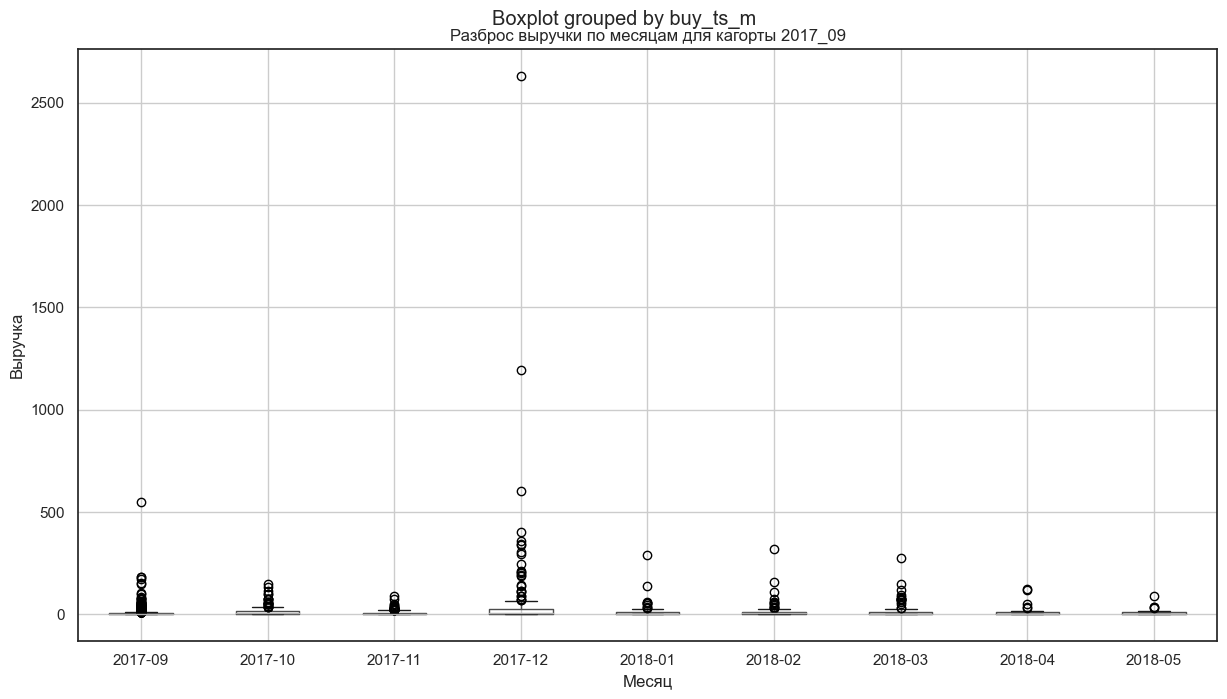

In [64]:
orders_new_2017_09.boxplot(column='revenue', by='buy_ts_m',figsize=(12, 7))
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.title('Разброс выручки по месяцам для кагорты 2017_09')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

При построении распределения заметно, что в декабре много значений выручки сосредоточены выше верхнего "уса" границы распределения, также есть 3 выброса, где выручка более 500, рассмотри данных клиентов:

In [65]:
display(orders_new_2017_09_12.query('revenue > 500'))

,buy_ts,revenue,uid,buy_ts_m,order_month,first_order_month
11730,2017-12-10 13:04:00,1195.64,5539673724080479777,2017-12,2017-12-01,2017-09-01
11732,2017-12-10 20:17:00,2633.28,5539673724080479777,2017-12,2017-12-01,2017-09-01
11745,2017-12-15 21:22:00,604.39,5539673724080479777,2017-12,2017-12-01,2017-09-01


Все 3 заказа пренадлежат одному и тому же клиенту:

In [73]:
display(orders_new_2017_09.query('revenue > 200'))

,buy_ts,revenue,uid,buy_ts_m,order_month,first_order_month
11723,2017-12-04 18:40:00,344.36,5539673724080479777,2017-12,2017-12-01,2017-09-01
11724,2017-12-05 00:50:00,402.72,5539673724080479777,2017-12,2017-12-01,2017-09-01
11728,2017-12-08 12:25:00,360.55,5539673724080479777,2017-12,2017-12-01,2017-09-01
11730,2017-12-10 13:04:00,1195.64,5539673724080479777,2017-12,2017-12-01,2017-09-01
11731,2017-12-10 15:58:00,243.83,5539673724080479777,2017-12,2017-12-01,2017-09-01
11732,2017-12-10 20:17:00,2633.28,5539673724080479777,2017-12,2017-12-01,2017-09-01
11733,2017-12-11 23:52:00,293.03,5539673724080479777,2017-12,2017-12-01,2017-09-01
11734,2017-12-12 10:15:00,200.44,5539673724080479777,2017-12,2017-12-01,2017-09-01
11745,2017-12-15 21:22:00,604.39,5539673724080479777,2017-12,2017-12-01,2017-09-01
11750,2017-12-18 19:07:00,337.33,5539673724080479777,2017-12,2017-12-01,2017-09-01


Большинство крупных заказов за весь период пренадлежит данному покупателю.

In [ ]:
uid_orders_2017_09 = orders_new_2017_09.groupby(['uid','order_month']).agg({'revenue': ['sum', 'count']}).reset_index()
uid_orders_2017_09.columns = ['uid','order_month', 'sum_rev','count_rev']
display(uid_orders_2017_09.sort_values(by = 'sum_rev', ascending = False).head(10))

Заказчик №5539673724080479777 совершил 30% от всех заказов этой когорты в декабре, и сумма его выручки составляет 90% от всей декабрьской выручки данной когорты. Поведение данного заказчика уникальное, и я могу предположить, что это либо массовая закупка для какой-то организации подарочных билетов к новому году, или для данного человека это бизнес, и он перепродает билеты. Возможно, стоит ввести какие-нибудь корпоративные скидки или привелегии для организаций и учебных заведений, которые будут стимулировать к большим заказам.

## 4.Отчеты и метрики.Маркетинг<a id="metr_mr"></a>

### 4.1 Сколько денег потратили всего / на каждый источник / по времени<a id="metr_mr_1"></a>

Найдем сумму затрат на рекламные источники:

In [ ]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')

In [ ]:
costs_pivot = costs.pivot_table(
        index='costs_month', 
        values='costs', 
        aggfunc='sum').reset_index()
display(costs_pivot)

In [ ]:
costs_pivot.plot(kind='barh', x='costs_month', ylim=0, grid=True, figsize=(12, 7),legend=False)
plt.legend(loc='upper right')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.title('Распределение затрат')
plt.xlabel('Затраты')
plt.ylabel('Месяца')
plt.show()

In [ ]:
print('Итого затрат:', costs['costs'].sum())

Больше всего затраты на рекламу были в октябре, ноябре и декабре 2017. Летом затраты на рекламу были минимальны.

In [ ]:
costs_id = costs.pivot_table(index=['costs_month'], columns='source_id', values='costs', aggfunc='sum').reset_index()
display(costs_id)

In [ ]:
costs_id.plot(kind='area', x='costs_month', ylim=0, grid=True, figsize=(12, 7),legend=False)
plt.legend(loc='upper right')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.title('Распределение кол-ва затрат на рекламу')
plt.xlabel('Месяца')
plt.ylabel('Кол-во затрат')
plt.show()

Каждый месяц самые высокие затраты приходятся на истоник с source_id = 3. Начиная с сентября затраты на этот источник начинают расти (увеличились в 2 раза). Затратах на остальные источники также увеличиваются к декабрю, но не значительно. 

### 4.2 Сколько стоило привлечение одного покупателя из каждого источника<a id="metr_mr_2"></a>

Сформируем таблицу, содержащую покупателя, источник, и первый переход с этого источника

In [ ]:
uid_source_id = visits[['uid','source_id','first_activity_date']].drop_duplicates().reset_index(drop = True)
display(uid_source_id.head())
display(len(visits['uid'].unique()))
print(uid_source_id['uid'].duplicated().sum())


Избавимся от дубликатов, оставим только первый переход пользователя с любого его источника:

In [ ]:
uid_source_id = uid_source_id.sort_values(by=['uid', 'first_activity_date']).drop_duplicates('uid')

display(uid_source_id.head())
display(len(uid_source_id['uid'].unique()))
print(uid_source_id['uid'].duplicated().sum())

In [ ]:
uid_source_id['first_month'] = uid_source_id['first_activity_date'].astype('datetime64[M]')

In [ ]:
display(uid_source_id.head())

Соединяем таблицы с заказами и пользователями, для которых определенн 

In [ ]:
uid_source_id_m = uid_source_id[['uid','source_id','first_month']]
uid_source_id_orders =  pd.merge(orders,uid_source_id_m, on='uid')
display(uid_source_id_orders.head())

Группируем полученную таблицу по месяцу первой покупки и источнику, находим кол-во людей в когортах

In [ ]:
uid_source_id_orders_pivot = uid_source_id_orders.pivot_table(index=['first_month'], columns='source_id', values='uid', aggfunc='count').reset_index()
uid_source_id_orders_pivot.columns = ['first_month', 'uid_1','uid_2','uid_3', 'uid_4','uid_5', 'uid_7', 'uid_9','uid_10']
display(uid_source_id_orders_pivot)

На источник с id 7 не было затрачено средств отделом маркетинга, и количество людей, пришедших из этого источника крайне мало. Для расчета САС - затрат на привлечение клиентов эти данные не нужны, поэтому я могу их удалить:

In [ ]:
del uid_source_id_orders_pivot['uid_7']
display(uid_source_id_orders_pivot)

Переименоем колонки в таблице costs_id:

In [ ]:
costs_id.columns = ['first_month', 'costs_1','costs_2','costs_3', 'costs_4','costs_5','costs_9','costs_10']

In [ ]:
display(costs_id)

Объединим таблицы, и найдем САС для каждого источника, за каждый месяц

In [ ]:
cac = pd.merge(uid_source_id_orders_pivot,costs_id, on='first_month')
display(cac)

In [ ]:
cac['cac_1'] = cac['costs_1']/cac['uid_1']
cac['cac_2'] = cac['costs_2']/cac['uid_2']
cac['cac_3'] = cac['costs_3']/cac['uid_3']
cac['cac_4'] = cac['costs_4']/cac['uid_4']
cac['cac_5'] = cac['costs_5']/cac['uid_5']
cac['cac_9'] = cac['costs_9']/cac['uid_9']
cac['cac_10'] = cac['costs_10']/cac['uid_10']
find_cac = cac[['first_month','cac_1','cac_2', 'cac_3', 'cac_4', 'cac_5', 'cac_9', 'cac_10']]
find_cac.set_index('first_month',inplace=True)
display(find_cac)

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Рассчет CAC каждого источника')
plt.xlabel('Источники')
plt.ylabel('Месяца')
sns.heatmap(find_cac,annot=True, linewidths=1, linecolor='gray')
plt.show()

Самый дорогой источник по привлечению клиентов - 3.

In [ ]:
find_cac_mean = find_cac.mean()
display(find_cac_mean)
print(find_cac_mean.plot(style='o-', legend = True))
plt.title('Средний CAC по источникам')
plt.xlabel('Источники')
plt.ylabel('Средний CAC')
plt.grid(axis='y', alpha=0.75)
plt.show()

За год самый высокий CAC также у источника 3, самый низкий  - у источника 1. У источников 9 и 10 также достаточно низкий САС. Возможно, источники 1,9,10 перспективны. 

Проверим как изменяется общий САС по всем источникам с течением времени:

In [ ]:
cac['uid_sum'] = cac.loc[:, 'uid_1':'uid_10'].sum(axis=1)
cac['costs_sum'] = cac.loc[:, 'costs_1':'costs_10'].sum(axis=1)
cac['cac'] = cac['costs_sum']/cac['uid_sum']
#display(cac)

In [ ]:
print(cac.plot(y='cac', x='first_month', style='o-', legend = False))
plt.title('CAC по всем источникам')
plt.xlabel('САС')
plt.ylabel('Месяц')
plt.grid(axis='y', alpha=0.75)
plt.show()

Самая низкая стоимость привлечения одного клиента (по всем источникам) в июне 2017г, и далее он увеличивается

In [ ]:
display(uid_source_id['source_id'].value_counts())

За весь период времени больше всего покупателей пришло из источника 4. Также крупные источники - 3 и 5. Источники 7 и 6 имеют единичные привлечения за весь год, возможно стоит проработать эти источники на наличие проблем или ошибок. В источник 3 ежемесячно вкладывается большая доля рекламного бюджета, но количество покупателей пришедших из него за год не максимальна, возможно стоит распределить финансирование более равномерно между источниками, уделяя большее внимание перспективным источникам 4 и 5 (крупные источники, с достаточно низким САС), а также проверить источники 1,9,10 подробнее, возможно они тоже имеют потенциал для роста покупателей.

### 4.3 На сколько окупились расходы (ROI)<a id="metr_mr_3"></a>

Найдем дату первого заказа:

In [ ]:
first_orders = uid_source_id_orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
display(first_orders.head())

Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [ ]:
cohort_fo_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_fo_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_fo_sizes.head()) 

Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [ ]:
uid_source_id_orders = pd.merge(uid_source_id_orders,first_orders, on='uid')
uid_source_id_orders = uid_source_id_orders.groupby(['first_order_month', 'order_month', 'source_id']).agg({'revenue': 'sum'}).reset_index()
orders_new = pd.merge(uid_source_id_orders,cohort_fo_sizes, on='first_order_month')
display(orders_new.head()) 


In [ ]:
orders_new['gp'] = orders_new['revenue'] * margin_rate
orders_new['age'] = (orders_new['order_month'] - orders_new['first_order_month']) / np.timedelta64(1, 'M')
orders_new['age'] = orders_new['age'].round().astype('int')
orders_new['ltv'] = orders_new['gp'] / orders_new['n_buyers']
#display(orders_new.head()) 

Сгруппируем таблицу расходов по ресурсу и дате затрат:

In [ ]:
cost_id_new = costs.groupby(['costs_month', 'source_id']).agg({'costs': 'sum'}).reset_index()
cost_id_new.columns = ['first_order_month', 'source_id','costs_sum']
display(cost_id_new.head())

Соединим таблицы затрат и расходов:

In [ ]:
report_new_id = pd.merge(orders_new,cost_id_new, on=['first_order_month','source_id'])
report_new_id['cac'] = report_new_id['costs_sum']/report_new_id['n_buyers']
report_new_id['romi'] = report_new_id['ltv']/report_new_id['cac']
display(report_new_id.head())

Построение общего heatmap, чтобы оценить общую динамику бизнеса 

In [ ]:
romi_full = report_new_id.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Накопительный ROMI')
plt.xlabel('Месяц жизни когорты')
plt.ylabel('Месяца')
sns.heatmap(romi_full.cumsum(axis=1),annot=True, linewidths=1, fmt='.1%', linecolor='gray')
plt.show()
    
display(romi_full.cumsum(axis=1).mean(axis=0))

Первые четыре когорты окупились достаточно быстро (2-4 месяцы жизни, 140-213%), также есть 2 когорты, которые окупились, но их ROMI пока не такой высокий, как у предыдущих (100-110%). Самые низкие показатели ROMI у январской и февральской когорт.

Напишем функцию вывода накопительного ROMI по источникам:

In [ ]:
def romi_id(i):
    print('Источник №', i)
    romi = report_new_id[ report_new_id['source_id'] == i]
    romi = romi.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')
    
    
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('Накопительный ROMI источника')
    plt.xlabel('Месяц жизни когорты')
    plt.ylabel('Месяца')
    sns.heatmap(romi.cumsum(axis=1),annot=True, linewidths=1, fmt='.1%', linecolor='gray')
    plt.show()
    
    display(romi.cumsum(axis=1).mean(axis=0))
    return romi

In [ ]:
id = report_new_id['source_id'].unique()

In [ ]:
for i in id:
    romi_id(i)

Накопительный ROMI посчитан для каждого источника:
* источник 1 - только 4 когорты не окупились в нулевом месяце, но на 4 месяце жизни окупились все когорты. Самый высокий накопительный ROMI у июньской когорты. У когорт этого источника самый высокий ROMI
* источник 2 - 50% когорт данного источника еще не окупились. У сентябрьской когорты данного источника наблюдается резкий рост ROMI на 3-ем месяце жизни. Данный рост связан с аномальным поведением одного покупателя, в декабре 2017г.
* источник 3 - за 12 месяцев ни одна из когорт не окупилась
* источник 4 - окупились 2 когорты (на 6-м и 0-м месяце жизни)
* источник 5 - окупились 3 когорты (на 2-м, 3-ем и 7-м месяце жизни)
* источник 9 - 50% когорт окупились в 0-м месяце жизни, 2 когорты - в 1 месяце, еще 4 пока не окупились
* источник 10 - в нулевом месяце окупились 2 когорты, остальные пока не окупились.

## ROI

Cгруппируем таблицу заказов по идентификатору пользователя:

In [ ]:
rev_uid = orders.pivot_table(index=['uid'], values='revenue', aggfunc='sum').reset_index()
rev_uid.columns = ['uid', 'rev_sum']
display(rev_uid.head())

Соединим таблицы выручки пользователей и uid_source_id:

In [ ]:
rev_source = pd.merge(uid_source_id,rev_uid, on='uid')
display(rev_source.head())
display(uid_source_id.head())

Сгруппируем по месяцам когорт выручку от кажого источника:

In [ ]:
uid_source_id_rev = rev_source.pivot_table(index=['first_month'], columns='source_id', values='rev_sum', aggfunc='sum').reset_index()
uid_source_id_rev.columns = ['first_month', 'rev_1','rev_2','rev_3', 'rev_4','rev_5', 'rev_7', 'rev_9','rev_10']
display(uid_source_id_rev)

Соединим таблицы доходов и затрат по источникам:

In [ ]:
roi = pd.merge(uid_source_id_rev,costs_id, on='first_month')
display(roi)

Найдем ROI для каждого источника и подготовим таблицу:

In [ ]:
roi['roi_1'] = (roi['rev_1']-roi['costs_1'])/roi['costs_1']
roi['roi_2'] = (roi['rev_2']-roi['costs_2'])/roi['costs_2']
roi['roi_3'] = (roi['rev_3']-roi['costs_3'])/roi['costs_3']
roi['roi_4'] = (roi['rev_4']-roi['costs_4'])/roi['costs_4']
roi['roi_5'] = (roi['rev_5']-roi['costs_5'])/roi['costs_5']
roi['roi_9'] = (roi['rev_9']-roi['costs_9'])/roi['costs_9']
roi['roi_10'] = (roi['rev_10']-roi['costs_10'])/roi['costs_10']
find_roi = roi[['first_month','roi_1','roi_2', 'roi_3', 'roi_4', 'roi_5', 'roi_9', 'roi_10']]
find_roi.set_index('first_month',inplace=True)
display(find_roi)

In [ ]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Рассчет ROI каждого источника')
plt.xlabel('Источники')
plt.ylabel('Месяца')
sns.heatmap(find_roi,annot=True, linewidths=1,fmt='.1%', linecolor='gray')
plt.show()

Проверим как изменяется ROI по всем источникам с течением времени:

In [ ]:
roi['rev_sum'] = roi.loc[:, 'rev_1':'rev_10'].sum(axis=1)
roi['costs_sum'] = roi.loc[:, 'costs_1':'costs_10'].sum(axis=1)
roi['roi'] = (roi['rev_sum']-roi['costs_sum'])/roi['costs_sum']*100
#display(roi)

In [ ]:
print(roi.plot(y='roi', x='first_month', style='o-', legend = False))
plt.title('ROI по всем источникам')
plt.xlabel('ROI')
plt.ylabel('Месяц')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
find_roi_mean = find_roi.mean()
find_roi_mean = find_roi_mean*100
#display(find_roi)
#display(find_roi_mean)

In [ ]:
print(find_roi_mean.plot(kind='bar', grid=True, figsize=(10, 5), legend = False))
plt.title('средний ROI по всем источникам')
plt.xlabel('Источники')
plt.ylabel('ROI')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
print('ROI по всем источникам за год', find_roi_mean.mean().round(2), '%')

Все источники к концу периода имеют отрицательные значения ROI. Источники 1,2,9 в некоторые месяца имели ROI более 100%, т.е. вложения в данные источники окупались. Самым убыточным из источников, можно назвать источник 3. Единственный источник который окупился за год, это источник 1.

## 5.Вывод<a id="conclusion"></a>

* большинство визитов совершается пользователями с устройств (decstop) - это компьютеры, ноутбуки. Количество уникальных пользователей увеличивается с августа по декабрь 2017. На устройствах decstop этот скачок особенно заметен. Возможно есть проблемы с мобильной версией сайта или приложением, т.к. зайти на сайт с телефона должно быть оперативнее, проще и быстрее, чем заходить с компьютера или ноутбука;
* после ноября 2017, коэффициент удержания падает. С каждой новой когортой все меньше пользователей остается. Коэффициент удержания когорты июня 2017 самый высокий в течении всей жизни когорты, стоит обратить внимание на то, как привлекались эти клиенты и какие обстоятельства способствуют их удержанию; 
* в среднем за 1 месяц формируется 4200 заказов, на 1 пользователя приходится 1,2 заказа. Максимальное количество заказов и пользователей зафиксированы в декабре 2017года, это обусловлено большим количеством предновогодних программ, утреников для детей, а также покупкой билетов в подарок к новогодним праздникам. Меньше всего пользователей и покупок летом и в сентябре - т.к. это пора отпусков и каникул;
* средний чек по выручке за весь период равен 4,99. В декабре 2017 самый высокий средний чек - 5,85, что обусловленно сезонным увеличением покупок;
* в первый месяц жизни во всех кагортах максимальный LTV. Далее этот показатель снижается. Самые высокие показатели итогового LTV наблюдаются в кагортах 06.2017 и 09.2017. В июньской кагорте нарастание итогового LTV идет равномерно, а в кагорте 09.2017 в декабре 2017 (на 3-ем месяце "жизни") есть значительный скачок в декабре 2017, данное увеличение связано с аномальным поведением одного из покупателей, который совершал большое количество покупок в декабре 2017. Если предположить, что это корпоративная закупка, то учитывая, какой доход она приносит, можно рассмотреть возможность внедрея корпоративных скидок или привелегий; 
- каждый месяц самые высокие затраты приходятся на истоник с source_id = 3. Начиная с сентября затраты на этот источник начинают расти (увеличились в 2 раза). Затраты на остальные источники также увеличиваются к декабрю, но не значительно. При этом источник 3 (а также 2 и 1) один из самых дорогих с точки зрения стоимости привлечения клиентов. Источники 9 и 10 имеют наименьшую стоимость привлечения клиентов, возможно они более перспективны. За весь период времени больше всего покупателей пришло из источника 4.  Источники 7 и 6 имеют единичные привлечения за весь год, нужно проработать их на наличие проблем или ошибок, или вообще отказаться от их финансирования. В источник 3 ежемесячно вкладывается большая доля рекламного бюджета, но количество покупателей пришедших из него за год не максимальна, стоит распределить финансирование более равномерно между источниками, уделяя большее внимание перспективным источникам 4, 9 и 10;
- все источники к концу периода имеют отрицательные значения ROI. Источники 1,2,9 в некоторые месяца имели ROI более 100%, т.е. вложения в данные источники окупались. Самым убыточным из источников, можно назвать источник 3. Единственный источник который окупился за год, это источник 1.
- Первые четыре когорты окупились достаточно быстро (2-4 месяцы жизни, 140-213%), также есть 2 когорты, которые окупились, но их ROMI пока не такой высокий, как у предыдущих (100-110%). Самые низкие показатели ROMI у январской и февральской когорт - возможно это связано также связано с сезоном. Можно отметить источник №1, как источник с самой высокой окупаемостью.